<a href="https://colab.research.google.com/github/wangechi-wq/Maize-Crop-Disease-Detection-Using-Machine-Learning-and-Computer-Vision/blob/main/Transfer_Learning_Inception_V3_We_are_the_Millers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maize Crop Disease Prediction

# 1.Defining the Question

# a) Specifying the Data Analytic Question

Does a maize plant has a disease or not, and if yes then what type of disease is it?

# b) Defining the Metric for Success

The model will be considered successful if both the training and validation accuracy are more than 80%

# c) Understanding the context

Maize is a basic ingredient in many regions across the world. In addition to being consumed directly by humans, maize is also used for corn ethanol, animal feed, and other maize products, such as corn starch and corn syrup. Maize plant diseases are a major problem in plant growth. Farmers should take the utmost care to detect the diseases of the plant. Plant age, pathogen species, and environment all play a role in symptom expression. The diseases are more common in humid, warm climates. Without early detection, these diseases spread rapidly, wiping out entire maize fields and severely impacting food security. By creating an accurate image recognition model through machine learning, we aim to help the farmer to detect the diseases affecting maize plants in order to mitigate the damage

# d) Recording the Experimental Design

Identify the business problem.

Define the success criteria.

Determine the appropriate computer vision techniques.

Collect and label training and test images.

Train and evaluate model.

Deploy and test.

Iterate on the solution.

# e) Data Relevance

# Importing the Libraries

In [2]:
# import the libraries as shown below
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow.keras as keras

In [4]:
#mounting the drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/Shareddrives/Group 1 /Splitted_Data/Train'
valid_path = '/content/drive/Shareddrives/Group 1 /Splitted_Data/Test'

In [6]:
# Import the inceptionv3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
# Making sure the existing weights ar not trained
for layer in inception.layers:
    layer.trainable = False
 

In [8]:
 #getting number of output classes
import os

folders = os.listdir('/content/drive/Shareddrives/Group 1 /Splitted_Data/Train')
folders

['Healthy Maize',
 'Maize Common Rust',
 'Maize Northern Leaf Blight',
 'Maize Head Smut',
 'Train Maize Streak',
 'Train Gray leaf spot']

In [9]:
# our layers - equal to the number of categories
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:

# tell the model what optimization method to use
model.compile(
  loss="categorical_crossentropy",
  optimizer=keras.optimizers.Adam(),
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescaling the train dataset
train_datagen = ImageDataGenerator(rescale = 1./255,)

test_datagen = ImageDataGenerator(rescale = 1./255)

#provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/Shareddrives/Group 1 /Splitted_Data/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 464 images belonging to 6 classes.


In [13]:
#rescalling the test dataset
test_set = test_datagen.flow_from_directory('/content/drive/Shareddrives/Group 1 /Splitted_Data/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 119 images belonging to 6 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
15/15 [==============================] - 183s 12s/step - loss: 15.4746 - accuracy: 0.2716 - val_loss: 7.5977 - val_accuracy: 0.4454
Epoch 2/10
15/15 [==============================] - 12s 824ms/step - loss: 3.9681 - accuracy: 0.6250 - val_loss: 5.3127 - val_accuracy: 0.4706
Epoch 3/10
15/15 [==============================] - 12s 794ms/step - loss: 1.0456 - accuracy: 0.8427 - val_loss: 3.4529 - val_accuracy: 0.5546
Epoch 4/10
15/15 [==============================] - 12s 793ms/step - loss: 0.3249 - accuracy: 0.9289 - val_loss: 4.1451 - val_accuracy: 0.5798
Epoch 5/10
15/15 [==============================] - 12s 809ms/step - loss: 0.5070 - accuracy: 0.9375 - val_loss: 3.1307 - val_accuracy: 0.5546
Epoch 6/10
15/15 [==============================] - 12s 800ms/step - loss: 0.4170 - accuracy: 0.9461 - val_loss: 3.8132 - val_accuracy: 0.5294
Epoch 7/10
15/15 [==============================] - 12s 813ms/step - loss: 0.5098 - accuracy: 0.9526 - val_loss: 4.3903 - val_accuracy: 0.5294

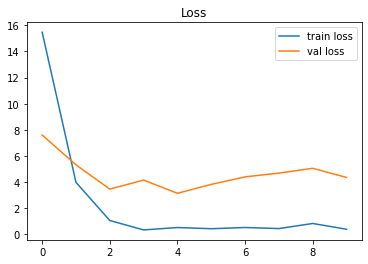

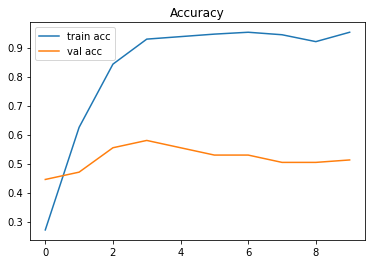

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()
plt.savefig('LossVal_loss')

print('\n')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [16]:
#Making predictions using the test set
y_pred = model.predict(test_set)
y_pred

array([[3.55367114e-16, 9.99938130e-01, 5.77319492e-24, 3.70349517e-05,
        5.84502368e-06, 1.89384191e-05],
       [1.39714940e-03, 7.59686809e-05, 1.59989213e-06, 5.77452838e-01,
        3.61322165e-01, 5.97502366e-02],
       [3.40579417e-32, 1.08986511e-26, 1.00000000e+00, 1.46341530e-20,
        3.48494423e-21, 2.23743346e-28],
       [2.28877401e-18, 9.99995828e-01, 1.00045250e-10, 1.47563020e-08,
        4.00032559e-06, 1.81893867e-07],
       [7.63991615e-03, 1.98226871e-06, 4.96411985e-07, 1.02158089e-03,
        9.90706921e-01, 6.29184418e-04],
       [9.96227026e-01, 3.82893433e-08, 6.70917725e-05, 3.70050897e-03,
        6.36674315e-07, 4.71761314e-06],
       [1.00000000e+00, 8.43970620e-27, 2.02811435e-32, 3.82438850e-18,
        1.40072416e-17, 1.01249108e-21],
       [7.02295266e-17, 9.99992728e-01, 1.67696258e-21, 9.69242642e-09,
        7.28189298e-06, 2.22993499e-10],
       [4.24046024e-19, 9.89925265e-01, 4.04060358e-17, 9.58187412e-03,
        2.53073289e-04, 

In [17]:
#put the predictions in an array of integers
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([1, 3, 2, 1, 4, 0, 0, 1, 1, 2, 5, 1, 0, 4, 4, 3, 2, 2, 1, 4, 3, 2,
       0, 4, 1, 1, 4, 1, 3, 4, 2, 0, 2, 3, 2, 2, 4, 4, 1, 5, 0, 1, 3, 3,
       5, 2, 3, 1, 1, 2, 1, 2, 3, 2, 2, 1, 3, 2, 4, 5, 1, 2, 1, 2, 3, 3,
       3, 4, 5, 1, 0, 3, 3, 0, 5, 1, 0, 0, 2, 2, 1, 0, 2, 5, 3, 2, 3, 3,
       3, 1, 3, 4, 3, 1, 1, 1, 3, 5, 1, 3, 3, 1, 0, 1, 1, 4, 3, 3, 5, 5,
       3, 5, 4, 2, 1, 2, 4, 3, 1])